In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import requests
import math as math
import datetime as dt
from sklearn.linear_model import LinearRegression

r = requests.get('https://data.winnipeg.ca/resource/du7c-8488.json')

trapDF = pd.DataFrame(r.json())
#trapDF.shape

# This part changes 'no data' entries to NaN entries
for cols in list(trapDF.columns):
    for indx in trapDF.index:
        if trapDF.at[indx, cols]=='no data':
            trapDF.at[indx, cols]=np.NaN
# changing coun_date type
trapDF['count_date'] = pd.to_datetime(trapDF['count_date'])            

trapDF=trapDF.sort_values(by=['count_date'])

# changing everything else to date type
for cols in list(trapDF.columns):
    if cols!='count_date':
        trapDF[cols]=pd.to_numeric(trapDF[cols])
        
        
        
# separating data into years
# TrapDF is a dictionary, lookup by year
TrapDF={}
for year in range(2015,2022):
    TrapDF[year]=trapDF[trapDF['count_date'].dt.year==year]
    #TrapDF[year].reset_index(inplace=True,drop=True)
TrapDF[2021].head()

# Replace north_west_i to NWi
replace={}
for ud in ['north','south']:
    for lr in ['west', 'east']:
        for i in range(1,8):
            word=ud+'_'+lr+'_'+str(i)
            replace[word]=ud[0].capitalize()+lr[0].capitalize()+str(i)
            print(word, replace[word])
for let in 'abcdefghi':
    word='rural_'+let+let
    replace[word]=2*let.capitalize()
    print(word, replace[word])

for ud in ['north','south']:
    for lr in ['west', 'east']:
        word=ud+'_'+lr+'_'+'average'
        replace[word]=ud[0].capitalize()+lr[0].capitalize()+'_avg'
        print(word, replace[word])    
    
replace['count_date']='date'
replace['city_wide_daily_average']='city_avg'

for year in range(2015,2022):
    TrapDF[year].rename(columns=replace,inplace=True)
    TrapDF[year].set_index('date',inplace=True)
    
TrapDF[2021].head()
#t=[TrapDF[2015],TrapDF[2016], TrapDF[2017],TrapDF[2018],TrapDF[2019],TrapDF[2020], TrapDF[2021] ]
#LargeTrDF=pd.concat(t)
#LargeTrDF

north_west_1 NW1
north_west_2 NW2
north_west_3 NW3
north_west_4 NW4
north_west_5 NW5
north_west_6 NW6
north_west_7 NW7
north_east_1 NE1
north_east_2 NE2
north_east_3 NE3
north_east_4 NE4
north_east_5 NE5
north_east_6 NE6
north_east_7 NE7
south_west_1 SW1
south_west_2 SW2
south_west_3 SW3
south_west_4 SW4
south_west_5 SW5
south_west_6 SW6
south_west_7 SW7
south_east_1 SE1
south_east_2 SE2
south_east_3 SE3
south_east_4 SE4
south_east_5 SE5
south_east_6 SE6
south_east_7 SE7
rural_aa AA
rural_bb BB
rural_cc CC
rural_dd DD
rural_ee EE
rural_ff FF
rural_gg GG
rural_hh HH
rural_ii II
north_west_average NW_avg
north_east_average NE_avg
south_west_average SW_avg
south_east_average SE_avg


C:\Users\aidin\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,city_avg,trap_days,NW1,NW2,NW3,NW4,NW5,NW6,NW7,NW_avg,...,SW_avg,AA,BB,CC,DD,EE,FF,GG,HH,II
date,,,,,,,,,,,,,,,,,,,,,
2021-05-03,0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-05-05,0,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,...,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2021-05-07,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-05-10,0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-05-12,0,2,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1,...,0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [2]:
col_list=['Date time', 'Maximum Temperature', 'Minimum Temperature', 'Temperature', 'Wind Chill', 'Heat Index', 'Precipitation', 'Wind Speed', 'Wind Direction', 'Wind Gust', 'Cloud Cover', 'Relative Humidity', 'Conditions']
WeathDF={}
for year in range(2015,2022):
    word='WeatherData\history_data_'+str(year)+'.csv'
    WeathDF[year]=pd.read_csv(word, usecols=col_list)
WeathDF[2015].head()

for year in range(2015,2022):
    WeathDF[year]['Date time'] = pd.to_datetime(WeathDF[year]['Date time'])            
    WeathDF[year]=WeathDF[year].sort_values(by=['Date time'])
# changing everything else to date type
for year in range(2015,2022):
    for cols in list(WeathDF[year].columns):
        if cols!='Date time' and cols!='Conditions':
            WeathDF[year][cols]=pd.to_numeric(WeathDF[year][cols])
replace={'Date time':'date', 'Maximum Temperature':'Max_T', 'Minimum Temperature':'Min_T', 'Temperature':'T', 'Relative Humidity':'Humidity'}
for year in range(2015,2022):
    WeathDF[year].rename(columns=replace,inplace=True)
    WeathDF[year].set_index('date',inplace=True)
WeathDF[2021].head()
#w=[WeathDF[2015],WeathDF[2016], WeathDF[2017],WeathDF[2018],WeathDF[2019],WeathDF[2020], WeathDF[2021] ]
#LargeWtDF=pd.concat(w)
#LargeWtDF

,Max_T,Min_T,T,Wind Chill,Heat Index,Precipitation,Wind Speed,Wind Direction,Wind Gust,Cloud Cover,Humidity,Conditions
date,,,,,,,,,,,,
2021-05-01,20.3,5.4,14.0,9.6,NaN,0.00,9.2,187.71,42.5,4.9,35.80,Clear
2021-05-02,11.2,3.7,7.8,1.0,NaN,4.95,14.0,135.50,31.5,5.7,65.58,Rain
2021-05-03,7.7,2.2,4.9,-0.9,NaN,0.00,16.2,337.25,46.3,7.2,53.20,Clear
2021-05-04,10.4,-0.5,5.0,-3.2,NaN,0.00,11.5,280.83,44.6,3.2,45.91,Clear
2021-05-05,10.9,-1.3,5.3,2.5,NaN,0.00,8.1,136.38,40.7,2.1,45.38,Clear


In [3]:
LocList=[]
for let in 'ABCDEFGHI':
    LocList.append(let+let)
for let in ['NE','NW','SE','SW']:
    for num in '1234567':
        LocList.append(let+num)
LocList.append('city_avg')
print(LocList)

TrWtDF={}
for year in range(2015,2022):
    TrWtDF[year]={}
    for loc in LocList:
        TrWtDF[year][loc]=pd.concat([TrapDF[year][loc], WeathDF[year]], axis=1, join="inner")
        
TrWtDF[2021]['city_avg'].head()
#tw=[TrWtDF[2015]['city_avg'],TrWtDF[2016]['city_avg'],TrWtDF[2017]['city_avg'],TrWtDF[2018]['city_avg'],TrWtDF[2019]['city_avg'],TrWtDF[2020]['city_avg'],TrWtDF[2021]['city_avg']]
#LargeTrWtDF=pd.concat(tw)
#LargeTrWtDF

['AA', 'BB', 'CC', 'DD', 'EE', 'FF', 'GG', 'HH', 'II', 'NE1', 'NE2', 'NE3', 'NE4', 'NE5', 'NE6', 'NE7', 'NW1', 'NW2', 'NW3', 'NW4', 'NW5', 'NW6', 'NW7', 'SE1', 'SE2', 'SE3', 'SE4', 'SE5', 'SE6', 'SE7', 'SW1', 'SW2', 'SW3', 'SW4', 'SW5', 'SW6', 'SW7', 'city_avg']


,city_avg,Max_T,Min_T,T,Wind Chill,Heat Index,Precipitation,Wind Speed,Wind Direction,Wind Gust,Cloud Cover,Humidity,Conditions
date,,,,,,,,,,,,,
2021-05-03,0,7.7,2.2,4.9,-0.9,NaN,0.0,16.2,337.25,46.3,7.2,53.20,Clear
2021-05-05,0,10.9,-1.3,5.3,2.5,NaN,0.0,8.1,136.38,40.7,2.1,45.38,Clear
2021-05-07,0,12.9,2.6,7.3,0.4,NaN,0.2,10.1,146.17,35.3,2.2,44.59,Rain
2021-05-10,0,13.2,-0.1,7.1,0.1,NaN,0.0,7.9,79.17,NaN,2.7,41.79,Clear
2021-05-12,0,23.2,6.6,16.2,NaN,NaN,0.0,10.0,212.13,39.8,1.0,21.59,Clear


In [4]:
TrWtDF[2021]['city_avg'].describe()

,city_avg,Max_T,Min_T,T,Wind Chill,Heat Index,Precipitation,Wind Speed,Wind Direction,Wind Gust,Cloud Cover,Humidity
count,42.000000,42.000000,42.000000,42.000000,8.000000,16.000000,42.000000,42.000000,42.000000,36.000000,42.000000,42.000000
mean,7.333333,24.780952,13.664286,19.338095,2.250000,29.581250,3.648095,13.500000,193.989048,45.125000,5.216667,52.837143
std,8.935178,6.412231,6.538883,5.996786,3.430535,2.128605,11.659968,4.711325,54.987484,10.132138,4.117359,13.759146
min,0.000000,7.700000,-1.300000,4.900000,-2.000000,26.600000,0.000000,5.600000,79.170000,29.500000,0.400000,21.590000
25%,1.000000,23.225000,10.225000,16.550000,-0.150000,28.175000,0.000000,10.275000,157.760000,37.100000,3.375000,44.937500
50%,4.500000,25.200000,15.650000,21.000000,1.450000,29.100000,0.200000,13.650000,194.230000,42.950000,4.350000,49.115000
75%,9.750000,29.250000,18.675000,23.650000,4.825000,30.850000,0.922500,15.900000,228.667500,50.000000,5.775000,58.710000
max,42.000000,35.100000,23.300000,27.500000,7.600000,33.600000,65.760000,32.300000,337.250000,70.400000,25.900000,89.280000


In [5]:
TrWtDF[2021]['city_avg'].describe(include='all')

,city_avg,Max_T,Min_T,T,Wind Chill,Heat Index,Precipitation,Wind Speed,Wind Direction,Wind Gust,Cloud Cover,Humidity,Conditions
count,42.000000,42.000000,42.000000,42.000000,8.000000,16.000000,42.000000,42.000000,42.000000,36.000000,42.000000,42.000000,42
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rain
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22
mean,7.333333,24.780952,13.664286,19.338095,2.250000,29.581250,3.648095,13.500000,193.989048,45.125000,5.216667,52.837143,NaN
std,8.935178,6.412231,6.538883,5.996786,3.430535,2.128605,11.659968,4.711325,54.987484,10.132138,4.117359,13.759146,NaN
min,0.000000,7.700000,-1.300000,4.900000,-2.000000,26.600000,0.000000,5.600000,79.170000,29.500000,0.400000,21.590000,NaN
25%,1.000000,23.225000,10.225000,16.550000,-0.150000,28.175000,0.000000,10.275000,157.760000,37.100000,3.375000,44.937500,NaN
50%,4.500000,25.200000,15.650000,21.000000,1.450000,29.100000,0.200000,13.650000,194.230000,42.950000,4.350000,49.115000,NaN
75%,9.750000,29.250000,18.675000,23.650000,4.825000,30.850000,0.922500,15.900000,228.667500,50.000000,5.775000,58.710000,NaN


In [6]:
pd.set_option.max_rows = None
TrWtDF[2021]['city_avg']

,city_avg,Max_T,Min_T,T,Wind Chill,Heat Index,Precipitation,Wind Speed,Wind Direction,Wind Gust,Cloud Cover,Humidity,Conditions
date,,,,,,,,,,,,,
2021-05-03,0,7.7,2.2,4.9,-0.9,NaN,0.00,16.2,337.25,46.3,7.2,53.20,Clear
2021-05-05,0,10.9,-1.3,5.3,2.5,NaN,0.00,8.1,136.38,40.7,2.1,45.38,Clear
2021-05-07,0,12.9,2.6,7.3,0.4,NaN,0.20,10.1,146.17,35.3,2.2,44.59,Rain
2021-05-10,0,13.2,-0.1,7.1,0.1,NaN,0.00,7.9,79.17,NaN,2.7,41.79,Clear
2021-05-12,0,23.2,6.6,16.2,NaN,NaN,0.00,10.0,212.13,39.8,1.0,21.59,Clear
2021-05-14,1,23.1,10.0,16.2,NaN,NaN,0.30,16.4,172.88,38.0,5.8,45.48,Rain
2021-05-17,0,30.4,11.4,21.6,NaN,28.5,0.20,19.4,168.13,50.0,4.1,38.11,Rain
2021-05-19,2,25.0,17.1,20.8,NaN,NaN,0.36,15.1,196.92,55.4,5.7,62.17,Rain
2021-05-21,1,13.3,6.6,9.3,4.5,NaN,7.21,15.9,196.79,38.9,7.7,89.28,Rain


In [7]:
#TrWtDF[2021]['city_avg'].drop(['Heat Index','Wind Chill','Wind Direction','Wind Gust'], axis = 1)
del TrWtDF[2021]['city_avg']['Heat Index'], TrWtDF[2021]['city_avg']['Wind Chill'], TrWtDF[2021]['city_avg']['Wind Direction']
del TrWtDF[2021]['city_avg']['Wind Gust']

In [8]:
TrWtDF[2021]['city_avg']

,city_avg,Max_T,Min_T,T,Precipitation,Wind Speed,Cloud Cover,Humidity,Conditions
date,,,,,,,,,
2021-05-03,0,7.7,2.2,4.9,0.00,16.2,7.2,53.20,Clear
2021-05-05,0,10.9,-1.3,5.3,0.00,8.1,2.1,45.38,Clear
2021-05-07,0,12.9,2.6,7.3,0.20,10.1,2.2,44.59,Rain
2021-05-10,0,13.2,-0.1,7.1,0.00,7.9,2.7,41.79,Clear
2021-05-12,0,23.2,6.6,16.2,0.00,10.0,1.0,21.59,Clear
2021-05-14,1,23.1,10.0,16.2,0.30,16.4,5.8,45.48,Rain
2021-05-17,0,30.4,11.4,21.6,0.20,19.4,4.1,38.11,Rain
2021-05-19,2,25.0,17.1,20.8,0.36,15.1,5.7,62.17,Rain
2021-05-21,1,13.3,6.6,9.3,7.21,15.9,7.7,89.28,Rain


In [9]:
TrWtDF[2021]['city_avg'].describe()

,city_avg,Max_T,Min_T,T,Precipitation,Wind Speed,Cloud Cover,Humidity
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,7.333333,24.780952,13.664286,19.338095,3.648095,13.500000,5.216667,52.837143
std,8.935178,6.412231,6.538883,5.996786,11.659968,4.711325,4.117359,13.759146
min,0.000000,7.700000,-1.300000,4.900000,0.000000,5.600000,0.400000,21.590000
25%,1.000000,23.225000,10.225000,16.550000,0.000000,10.275000,3.375000,44.937500
50%,4.500000,25.200000,15.650000,21.000000,0.200000,13.650000,4.350000,49.115000
75%,9.750000,29.250000,18.675000,23.650000,0.922500,15.900000,5.775000,58.710000
max,42.000000,35.100000,23.300000,27.500000,65.760000,32.300000,25.900000,89.280000


In [10]:
TrWtDF[2021]['city_avg']['Conditions'] = TrWtDF[2021]['city_avg']['Conditions'].map({'Rain' :1, 'Rain, Partially cloudy':1, 'Clear' :0})
TrWtDF[2021]['city_avg']['Conditions']

date
2021-05-03    0
2021-05-05    0
2021-05-07    1
2021-05-10    0
2021-05-12    0
2021-05-14    1
2021-05-17    1
2021-05-19    1
2021-05-21    1
2021-05-25    1
2021-05-28    0
2021-05-31    1
2021-06-02    1
2021-06-04    0
2021-06-07    0
2021-06-09    1
2021-06-11    1
2021-06-14    0
2021-06-16    1
2021-06-18    1
2021-06-21    0
2021-06-23    0
2021-06-25    0
2021-06-28    0
2021-06-30    0
2021-07-02    0
2021-07-05    0
2021-07-07    0
2021-07-09    1
2021-07-12    1
2021-07-14    1
2021-07-16    1
2021-07-19    1
2021-07-21    1
2021-07-23    0
2021-07-26    1
2021-07-28    0
2021-07-30    1
2021-08-04    1
2021-08-06    0
2021-08-09    1
2021-08-11    1
Name: Conditions, dtype: int64

In [11]:
TrWtDF[2021]['city_avg']

,city_avg,Max_T,Min_T,T,Precipitation,Wind Speed,Cloud Cover,Humidity,Conditions
date,,,,,,,,,
2021-05-03,0,7.7,2.2,4.9,0.00,16.2,7.2,53.20,0
2021-05-05,0,10.9,-1.3,5.3,0.00,8.1,2.1,45.38,0
2021-05-07,0,12.9,2.6,7.3,0.20,10.1,2.2,44.59,1
2021-05-10,0,13.2,-0.1,7.1,0.00,7.9,2.7,41.79,0
2021-05-12,0,23.2,6.6,16.2,0.00,10.0,1.0,21.59,0
2021-05-14,1,23.1,10.0,16.2,0.30,16.4,5.8,45.48,1
2021-05-17,0,30.4,11.4,21.6,0.20,19.4,4.1,38.11,1
2021-05-19,2,25.0,17.1,20.8,0.36,15.1,5.7,62.17,1
2021-05-21,1,13.3,6.6,9.3,7.21,15.9,7.7,89.28,1


In [12]:
del TrWtDF[2021]['city_avg']['Precipitation']
TrWtDF[2021]['city_avg']

,city_avg,Max_T,Min_T,T,Wind Speed,Cloud Cover,Humidity,Conditions
date,,,,,,,,
2021-05-03,0,7.7,2.2,4.9,16.2,7.2,53.20,0
2021-05-05,0,10.9,-1.3,5.3,8.1,2.1,45.38,0
2021-05-07,0,12.9,2.6,7.3,10.1,2.2,44.59,1
2021-05-10,0,13.2,-0.1,7.1,7.9,2.7,41.79,0
2021-05-12,0,23.2,6.6,16.2,10.0,1.0,21.59,0
2021-05-14,1,23.1,10.0,16.2,16.4,5.8,45.48,1
2021-05-17,0,30.4,11.4,21.6,19.4,4.1,38.11,1
2021-05-19,2,25.0,17.1,20.8,15.1,5.7,62.17,1
2021-05-21,1,13.3,6.6,9.3,15.9,7.7,89.28,1


In [13]:
TrWtDF[2021]['city_avg']=TrWtDF[2021]['city_avg'].rename({'city_avg':'City Avg','Conditions': 'Precipitation','T': 'Temperature','Max_T': 'Max Temp', 'Min_T':'Min Temp'}, axis=1) 
TrWtDF[2021]['city_avg']

,City Avg,Max Temp,Min Temp,Temperature,Wind Speed,Cloud Cover,Humidity,Precipitation
date,,,,,,,,
2021-05-03,0,7.7,2.2,4.9,16.2,7.2,53.20,0
2021-05-05,0,10.9,-1.3,5.3,8.1,2.1,45.38,0
2021-05-07,0,12.9,2.6,7.3,10.1,2.2,44.59,1
2021-05-10,0,13.2,-0.1,7.1,7.9,2.7,41.79,0
2021-05-12,0,23.2,6.6,16.2,10.0,1.0,21.59,0
2021-05-14,1,23.1,10.0,16.2,16.4,5.8,45.48,1
2021-05-17,0,30.4,11.4,21.6,19.4,4.1,38.11,1
2021-05-19,2,25.0,17.1,20.8,15.1,5.7,62.17,1
2021-05-21,1,13.3,6.6,9.3,15.9,7.7,89.28,1


In [14]:
TrWtDF[2021]['city_avg'].describe(include='all')

,City Avg,Max Temp,Min Temp,Temperature,Wind Speed,Cloud Cover,Humidity,Precipitation
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,7.333333,24.780952,13.664286,19.338095,13.500000,5.216667,52.837143,0.547619
std,8.935178,6.412231,6.538883,5.996786,4.711325,4.117359,13.759146,0.503761
min,0.000000,7.700000,-1.300000,4.900000,5.600000,0.400000,21.590000,0.000000
25%,1.000000,23.225000,10.225000,16.550000,10.275000,3.375000,44.937500,0.000000
50%,4.500000,25.200000,15.650000,21.000000,13.650000,4.350000,49.115000,1.000000
75%,9.750000,29.250000,18.675000,23.650000,15.900000,5.775000,58.710000,1.000000
max,42.000000,35.100000,23.300000,27.500000,32.300000,25.900000,89.280000,1.000000


C:\Users\aidin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='City Avg', ylabel='Density'>

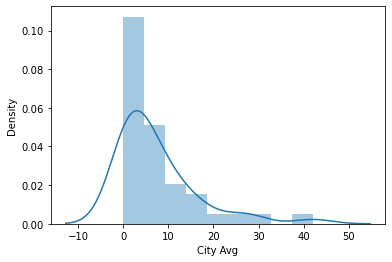

In [15]:
# A great step in the data exploration is to display the probability distribution function (PDF) of a variable
# The PDF will show us how that variable is distributed 
# This makes it very easy to spot anomalies, such as outliers
# The PDF is often the basis on which we decide whether we want to transform a feature
sns.distplot(TrWtDF[2021]['city_avg']['City Avg'])


C:\Users\aidin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Max Temp', ylabel='Density'>

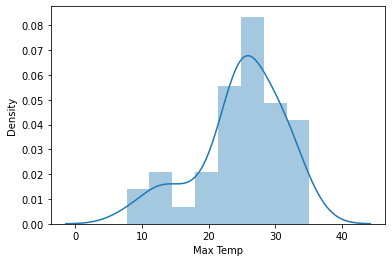

In [16]:
sns.distplot(TrWtDF[2021]['city_avg']['Max Temp'])

C:\Users\aidin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Min Temp', ylabel='Density'>

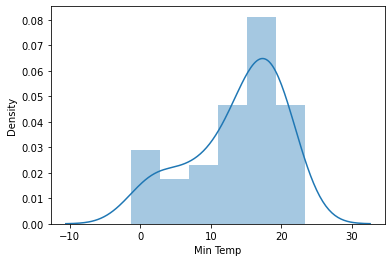

In [17]:
sns.distplot(TrWtDF[2021]['city_avg']['Min Temp'])

C:\Users\aidin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Temperature', ylabel='Density'>

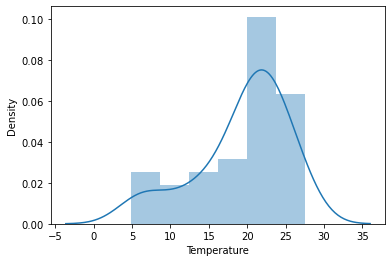

In [18]:
sns.distplot(TrWtDF[2021]['city_avg']['Temperature'])

C:\Users\aidin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Wind Speed', ylabel='Density'>

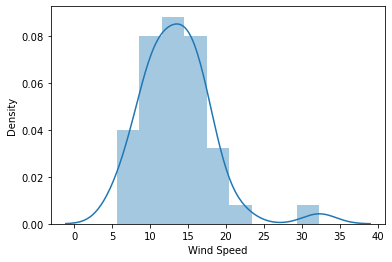

In [19]:
sns.distplot(TrWtDF[2021]['city_avg']['Wind Speed'])

C:\Users\aidin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Cloud Cover', ylabel='Density'>

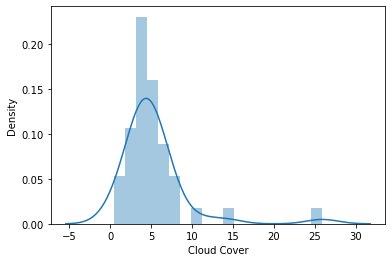

In [20]:
sns.distplot(TrWtDF[2021]['city_avg']['Cloud Cover'])

C:\Users\aidin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Humidity', ylabel='Density'>

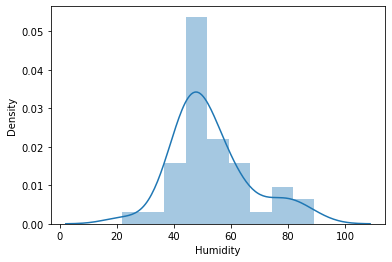

In [21]:
sns.distplot(TrWtDF[2021]['city_avg']['Humidity'])

C:\Users\aidin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Precipitation', ylabel='Density'>

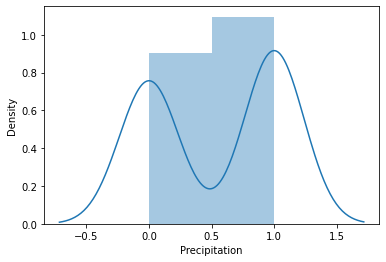

In [22]:
sns.distplot(TrWtDF[2021]['city_avg']['Precipitation'])

In [23]:
#checking the OLS assumptions: 
#1. linearity 2. No Endogeneity (ommited variable bias) 
#3. Normality and Homoscedasticity 4. No Autocorrelation 5. No Multicolinearity

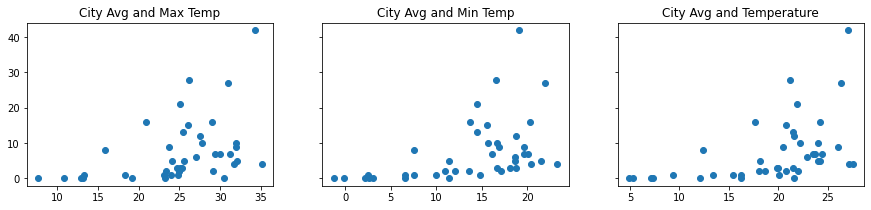

In [24]:
#checking normality
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(TrWtDF[2021]['city_avg']['Max Temp'],TrWtDF[2021]['city_avg']['City Avg'])
ax1.set_title('City Avg and Max Temp')
ax2.scatter(TrWtDF[2021]['city_avg']['Min Temp'],TrWtDF[2021]['city_avg']['City Avg'])
ax2.set_title('City Avg and Min Temp')
ax3.scatter(TrWtDF[2021]['city_avg']['Temperature'],TrWtDF[2021]['city_avg']['City Avg'])
ax3.set_title('City Avg and Temperature')


plt.show()

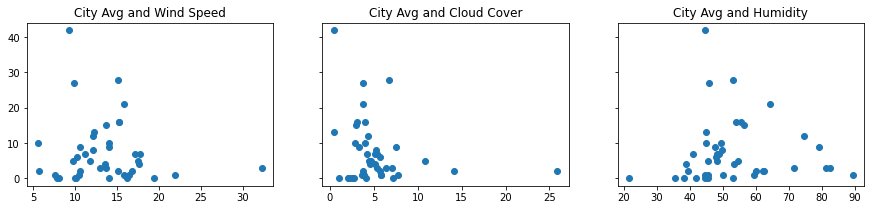

In [25]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(TrWtDF[2021]['city_avg']['Wind Speed'],TrWtDF[2021]['city_avg']['City Avg'])
ax1.set_title('City Avg and Wind Speed')
ax2.scatter(TrWtDF[2021]['city_avg']['Cloud Cover'],TrWtDF[2021]['city_avg']['City Avg'])
ax2.set_title('City Avg and Cloud Cover')
ax3.scatter(TrWtDF[2021]['city_avg']['Humidity'],TrWtDF[2021]['city_avg']['City Avg'])
ax3.set_title('City Avg and Humidity')



plt.show()

In [26]:
#dropping similarly distributed features
del TrWtDF[2021]['city_avg']['Max Temp'] , TrWtDF[2021]['city_avg']['Temperature'] 

In [27]:
TrWtDF[2021]['city_avg'].describe(include='all')

,City Avg,Min Temp,Wind Speed,Cloud Cover,Humidity,Precipitation
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,7.333333,13.664286,13.500000,5.216667,52.837143,0.547619
std,8.935178,6.538883,4.711325,4.117359,13.759146,0.503761
min,0.000000,-1.300000,5.600000,0.400000,21.590000,0.000000
25%,1.000000,10.225000,10.275000,3.375000,44.937500,0.000000
50%,4.500000,15.650000,13.650000,4.350000,49.115000,1.000000
75%,9.750000,18.675000,15.900000,5.775000,58.710000,1.000000
max,42.000000,23.300000,32.300000,25.900000,89.280000,1.000000


In [28]:
#checking multicolinearity


# sklearn does not have a built-in way to check for multicollinearity
# one of the main reasons is that this is an issue well covered in statistical frameworks and not in ML ones
# it is an issue and we will try to deal with it

from statsmodels.stats.outliers_influence import variance_inflation_factor

#we declare a variable where we put all features where we want to check for multicollinearity
fs = TrWtDF[2021]['city_avg'][['City Avg', 'Min Temp',  'Cloud Cover', 'Wind Speed', 'Humidity', 'Precipitation']]

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(fs.values, i) for i in range(fs.shape[1])]
vif["Features"] = fs.columns
vif
#as a rule of thumb, a vif>10 should be dropped as it may not add to descriptive power of the model because of multicolinearity
#but it's a personal preference , more info at: https://en.wikipedia.org/wiki/Variance_inflation_factor

,VIF,Features
0,2.589255,City Avg
1,7.783427,Min Temp
2,3.045342,Cloud Cover
3,8.647575,Wind Speed
4,11.649952,Humidity
5,3.022854,Precipitation


In [29]:
# Since Humidity has the highest VIF, I will remove it from the model
# This will drive the VIF of other variables down!!! 
# So even if others seems with a high VIF, too, once 'Humidity' is gone that will no longer be the case
del  TrWtDF[2021]['city_avg']['Humidity'] 

In [30]:
#For 'Temperature', 'Max Temp', and 'Min Temp', I have tried all possible combinations and having only 'Min Temp' was the best.

In [31]:
 TrWtDF[2021]['city_avg'].describe(include = 'all')

,City Avg,Min Temp,Wind Speed,Cloud Cover,Precipitation
count,42.000000,42.000000,42.000000,42.000000,42.000000
mean,7.333333,13.664286,13.500000,5.216667,0.547619
std,8.935178,6.538883,4.711325,4.117359,0.503761
min,0.000000,-1.300000,5.600000,0.400000,0.000000
25%,1.000000,10.225000,10.275000,3.375000,0.000000
50%,4.500000,15.650000,13.650000,4.350000,1.000000
75%,9.750000,18.675000,15.900000,5.775000,1.000000
max,42.000000,23.300000,32.300000,25.900000,1.000000


In [32]:
variables =  TrWtDF[2021]['city_avg'].drop(['City Avg'],axis=1)
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns
vif

,VIF,features
0,4.500359,Min Temp
1,5.370036,Wind Speed
2,2.858476,Cloud Cover
3,2.576942,Precipitation


In [33]:
# Regression Model
targets = TrWtDF[2021]['city_avg']['City Avg']

inputs = TrWtDF[2021]['city_avg'].drop(['City Avg'],axis=1)

In [34]:
#scaling the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [35]:
# scaling the features in a new variable
inputs_scaled = scaler.transform(inputs)

In [36]:
#train test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state= None)

In [37]:
#linear regression object
reg = LinearRegression()

reg.fit(x_train,y_train)

LinearRegression()

In [38]:
#checking the outputs of the regression
y_hat = reg.predict(x_train)

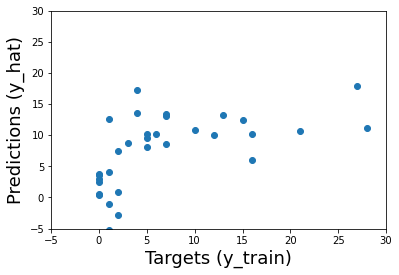

In [39]:
# comparing the targets (y_train) and the predictions (y_hat) by plotting them on a scatter plot
# To see how close we are to the 45-degree line
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.xlim(-5,30)
plt.ylim(-5,30)
plt.show()

C:\Users\aidin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residuals PDF')

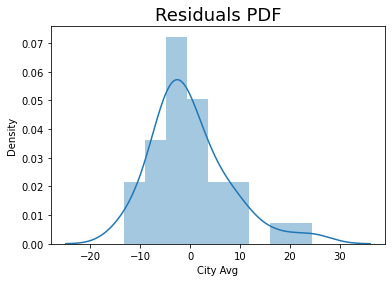

In [40]:
# Another useful check of our model is a residual plot
# We can plot the the probability distribution function of the residuals and check for irregularities
sns.distplot(y_train - y_hat)

plt.title("Residuals PDF", size=18)

# In the best case scenario this plot should be normally distributed
# In our case we notice that there are a few negative residuals (far away from the mean)
# Given the definition of the residuals (y_train - y_hat), negative values imply 
#that y_hat (predictions) are much higher than y_train (the targets)

In [41]:
#R-squared of the model: how much of the variability of the data is predicted
reg.score(x_train,y_train)

0.3661384323533239

In [42]:
#weights and biases
reg.intercept_

7.802418961557009

In [43]:
reg.coef_


array([ 4.54182349, -1.61910685, -1.65601566, -2.25873937])

In [44]:
#comparing weights
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Min Temp,4.541823
1,Wind Speed,-1.619107
2,Cloud Cover,-1.656016
3,Precipitation,-2.258739


In [45]:
#Testing
# Testing is done on a dataset that the algorithm has never seen
# test inputs:'x_test', outputs:'y_test' 
# If the predictions are far off, means our model overfitted
y_hat_test = reg.predict(x_test)

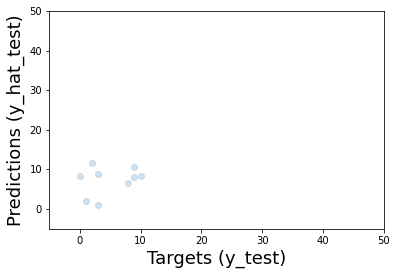

In [46]:
# A scatter plot with the test targets and the test predictions
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(-5,50)
plt.ylim(-5,50)
plt.show()

In [47]:
# Checking these predictions
df_pf = pd.DataFrame(y_hat_test, columns=['Prediction'])
df_pf.head()

,Prediction
0,6.447783
1,8.103401
2,0.862708
3,8.204958
4,1.927284


In [48]:
#Include the test targets in that data frame
df_pf['Target'] = y_test
df_pf

,Prediction,Target
0,6.447783,NaN
1,8.103401,NaN
2,0.862708,NaN
3,8.204958,NaN
4,1.927284,NaN
5,11.674726,NaN
6,8.696856,NaN
7,8.255248,NaN
8,10.528633,NaN


In [49]:
# Checking and resetting the index and drop the old indexing
y_test = y_test.reset_index(drop=True)
y_test.head()

0     8
1     9
2     3
3    10
4     1
Name: City Avg, dtype: int64

In [50]:
# Let's overwrite the 'Target' column with the appropriate values
# Again, we need the exponential of the test log price
df_pf['Target'] = y_test
df_pf

,Prediction,Target
0,6.447783,8
1,8.103401,9
2,0.862708,3
3,8.204958,10
4,1.927284,1
5,11.674726,2
6,8.696856,3
7,8.255248,0
8,10.528633,9


In [51]:
# We can calculate the difference between the targets and the predictions
# This is actually the residual we already plotted.
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

# Since OLS is an algorithm which minimizes the total sum of squared errors (residuals),this comparison would make sense.

In [52]:
# The absolute difference in %
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,6.447783,8,1.552217,19.402709
1,8.103401,9,0.896599,9.962215
2,0.862708,3,2.137292,71.243070
3,8.204958,10,1.795042,17.950418
4,1.927284,1,-0.927284,92.728357
5,11.674726,2,-9.674726,483.736317
6,8.696856,3,-5.696856,189.895192
7,8.255248,0,-8.255248,inf
8,10.528633,9,-1.528633,16.984807


In [53]:
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,9.000000,9.000000,9.000000,9.000000
mean,7.189066,5.000000,-2.189066,inf
std,3.619578,3.937004,4.545266,NaN
min,0.862708,0.000000,-9.674726,9.962215
25%,6.447783,2.000000,-5.696856,17.950418
50%,8.204958,3.000000,-0.927284,71.243070
75%,8.696856,9.000000,1.552217,189.895192
max,11.674726,10.000000,2.137292,inf


In [54]:
# Checking outputs manually
pd.options.display.max_rows = 999
# To show it clearly, only 2 digits after the dot are displayed. 
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
1,8.10,9,0.90,9.96
8,10.53,9,-1.53,16.98
3,8.20,10,1.80,17.95
0,6.45,8,1.55,19.40
2,0.86,3,2.14,71.24
4,1.93,1,-0.93,92.73
6,8.70,3,-5.70,189.90
5,11.67,2,-9.67,483.74
7,8.26,0,-8.26,inf
